## <b><span style='color:#F1A424'>4.6 | EM-алгоритм Практика</span></b> 

Пример работы `EM-алгоритма`:
- **выбираем число кластеров**, которое нам кажется оптимальным, в нашем случае их два;
- выбираем параметр распределений;
- для каждой точки набора считаем вероятность принадлежности каждому распределению;
- пересчитываем параметры распределения;
- повторяем шаги: снова присваиваем точку распределению и считаем параметры.

In [8]:
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
# import seaborn as sns; sns.set(style='whitegrid')

np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы    
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

- Рассмотрим реализацию алгоритмы в библиотеке Sklearn. Наш алгоритм лежит в пакете GaussianMixture. 
- При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.

In [9]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

- Посмотрим, как EM-алгоритм будет работать с нашим набором данных. 
- Сделаем нормализацию признаков объектов, создадим объект, который будет кластеризовать, вызовем методы fit() и predict() и построим получившиеся кластеры для наших датасетов.

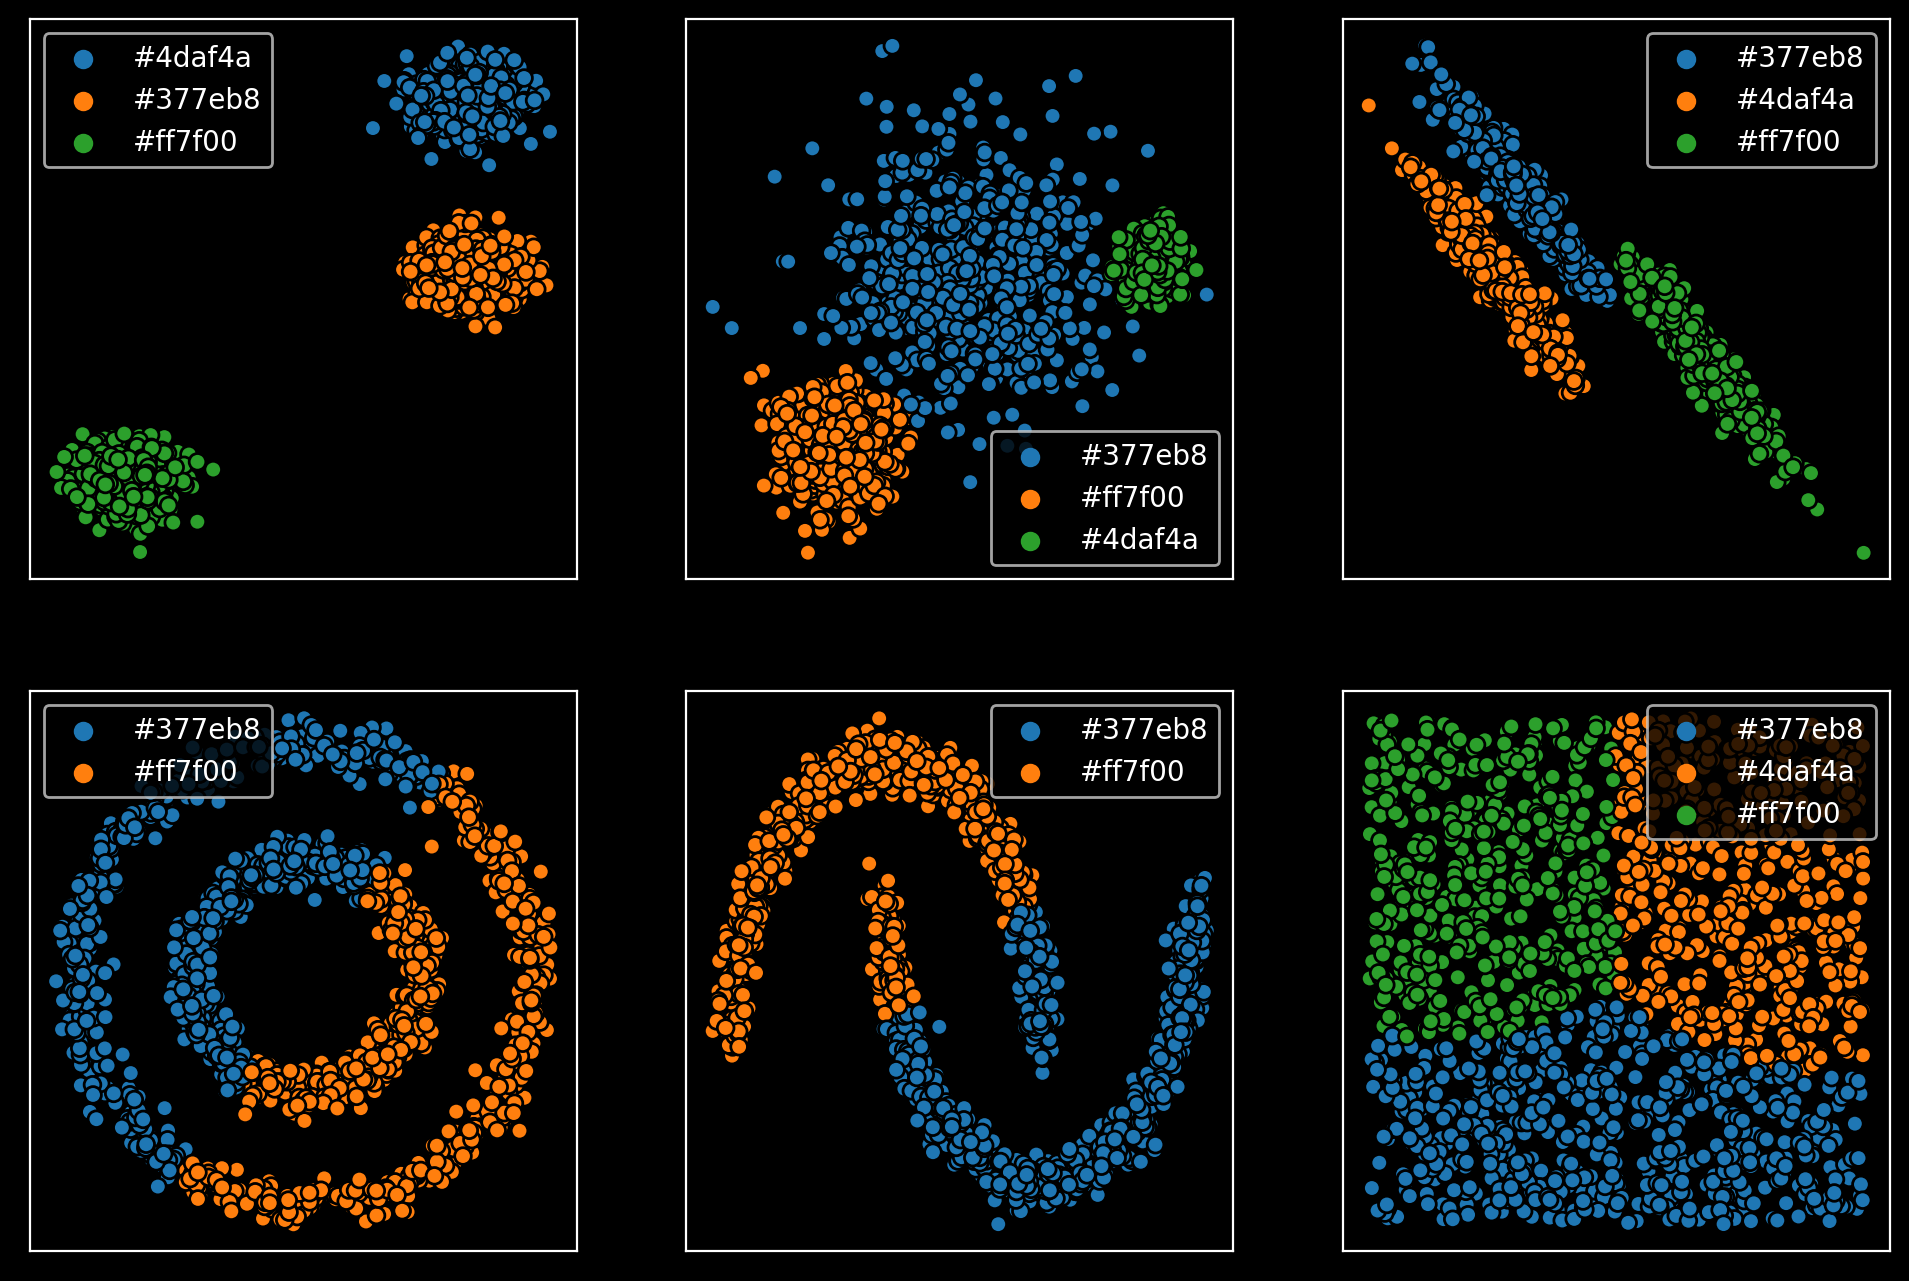

In [10]:
plt.rcParams['figure.figsize'] = 12, 8

datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})
]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=colors[y_pred],
                    edgecolor='k',linewidth=1)
#     plt.tight_layout()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

### <b>Задание <span style='color:#F1A424'>4.6.1</span></b> 

В алгоритме K-means за число кластеров отвечал параметр n_clusters. Какой параметр задаёт число кластеров в EM-алгоритме?

`n_components`

### <b>Задание <span style='color:#F1A424'>4.6.2</span></b> 

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.
Какие средние значения будут у получившихся распределений кластеров?

In [12]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3,random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
means = gm.means_
print(means)

np.round(means).astype(np.int)

[[-2.21861264 -4.15574239]
 [ 1.01124148  4.31664695]
 [-4.94579669  0.04257022]]


array([[-2, -4],
       [ 1,  4],
       [-5,  0]])

### <b>Задание <span style='color:#F1A424'>4.6.3</span></b> 

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

In [13]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count,end=' ')

788 1510 702 

## <b><span style='color:#F1A424'>4.7 | Агломеративная кластеризация Практика
</span></b> 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [15]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()
ac.fit(X)
ac.labels_

array([0, 0, 0, ..., 1, 1, 1])

# <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden;background-image: url(https://i.imgur.com/ohv2A06.png)"><b><span style='color:#F1A424'>4.7 |</span></b> EM-алгоритм Практика</div>

При каком значении параметра linkage при создании объекта AgglomerativeClustering критерием объединения кластеров будет среднее расстояние между объектами объединяемых кластеров?



In [16]:
# Задание 4.7.2
# Обучите модель AgglomerativeClustering с параметром n_clusters=3 на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

# Задание 4.7.3
# Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac.labels_
print(ac.n_leaves_)  # 4.7.2
print(np.unique(ac.labels_,return_counts=True)) # 4.7.3

3000
(array([0, 1, 2]), array([1112, 1142,  746]))


### <b>Задание <span style='color:#F1A424'>4.7.4</span></b> 

При создании модели `AgglomerativeClustering` можно указать **матрицу смежности**, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

In [17]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [18]:
# В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.
# В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

ac = AgglomerativeClustering(n_clusters=3,
                        connectivity=connectivity)
ac.fit(X)
ac.labels_
print(np.unique(ac.labels_,return_counts=True))


(array([0, 1, 2]), array([1486,  746,  768]))


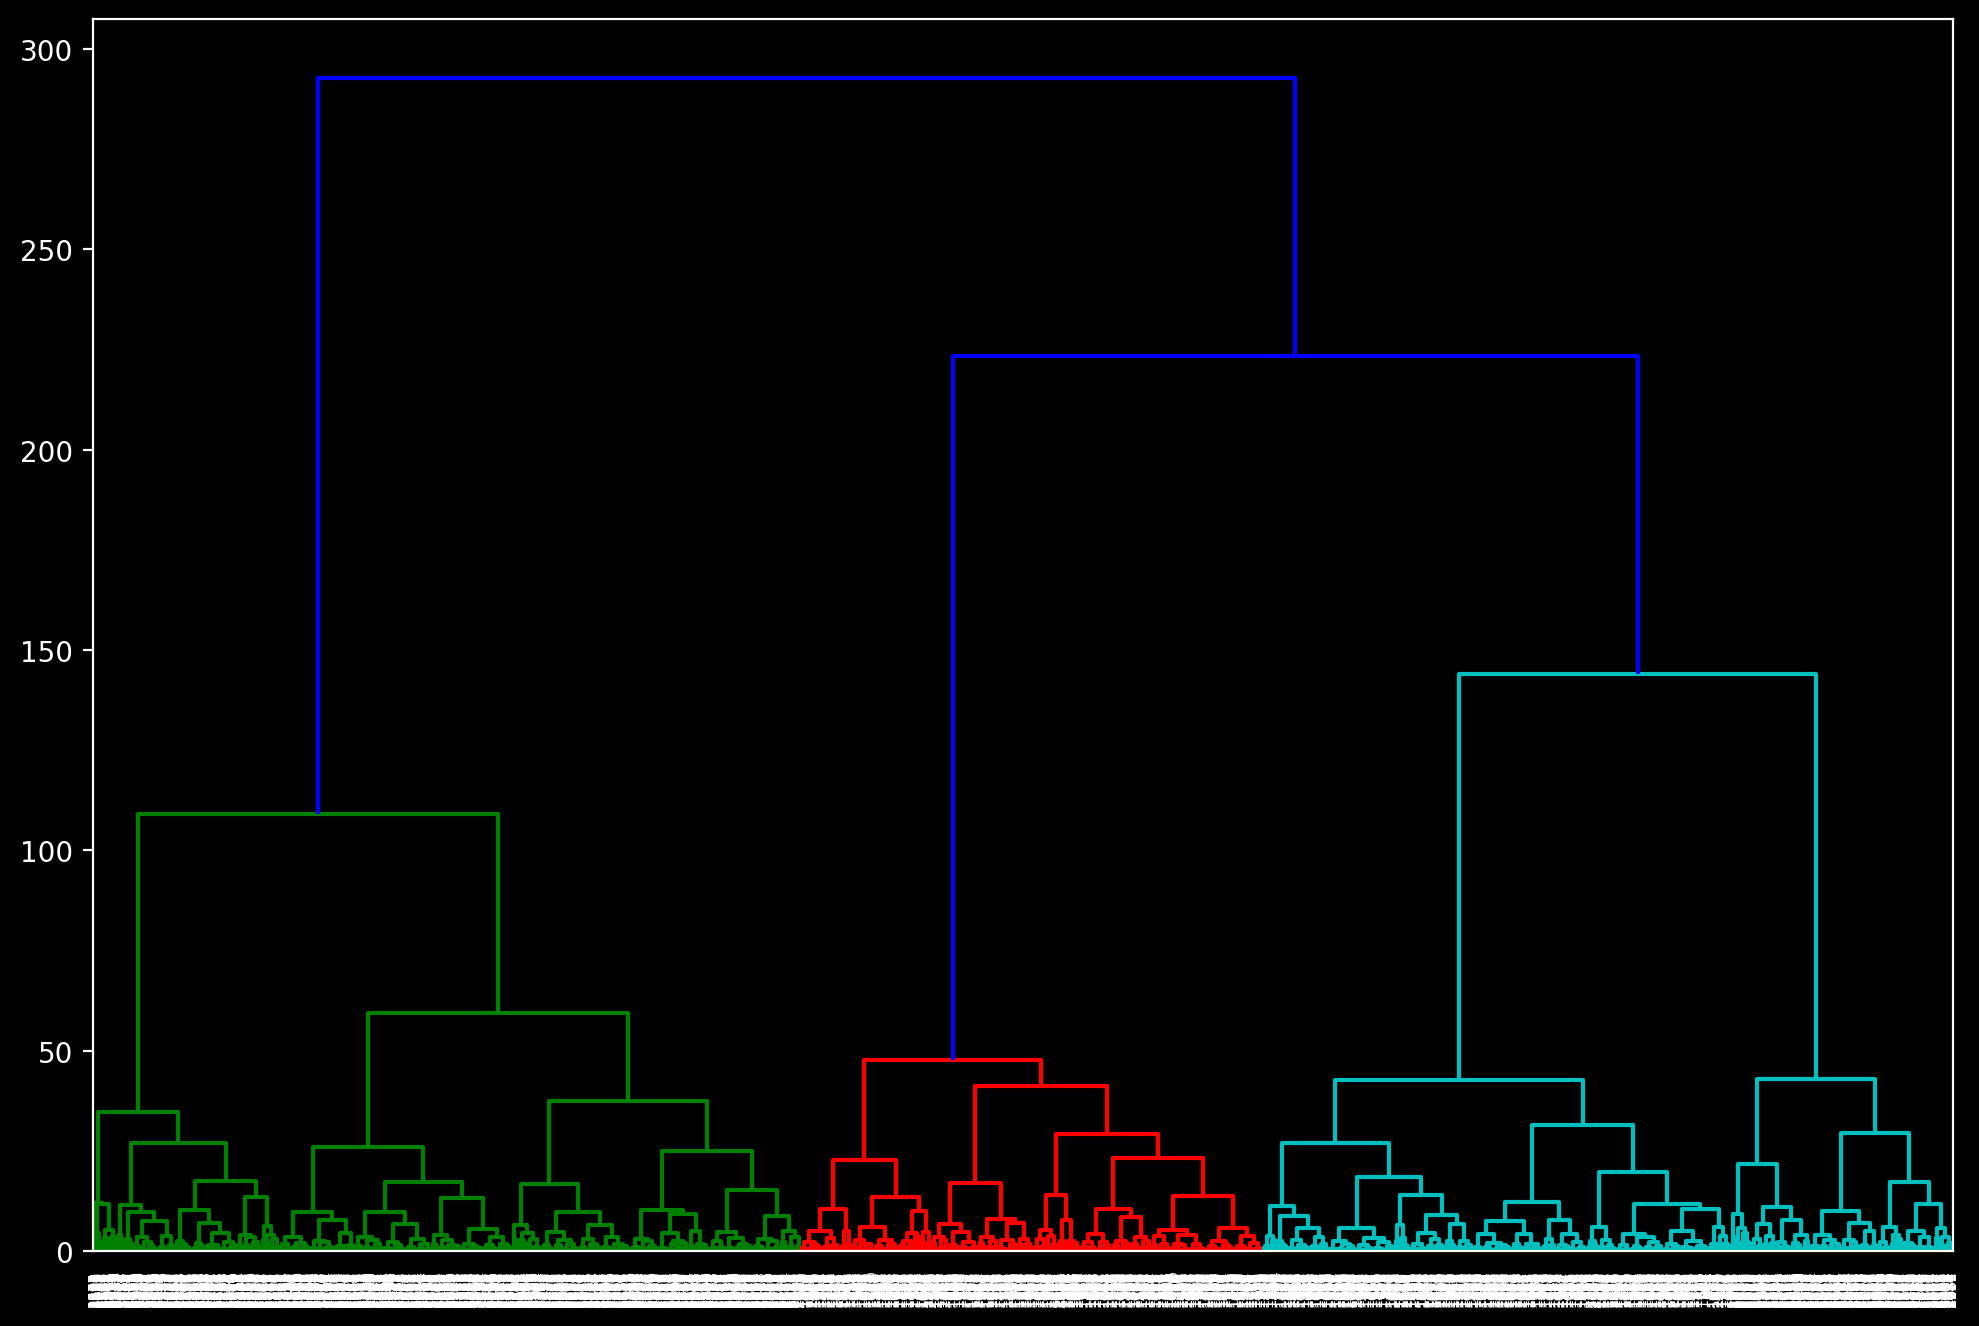

In [19]:
# Задание 4.7.5
# Постройте дендрограмму с помощью пакета scipy:

from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
plt.figure()
dn = dendrogram(Z, leaf_rotation=90.0)

# <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden;background-image: url(https://i.imgur.com/ohv2A06.png)"><b><span style='color:#F1A424'>4.8 |</span></b> DBSCAN Практика</div>

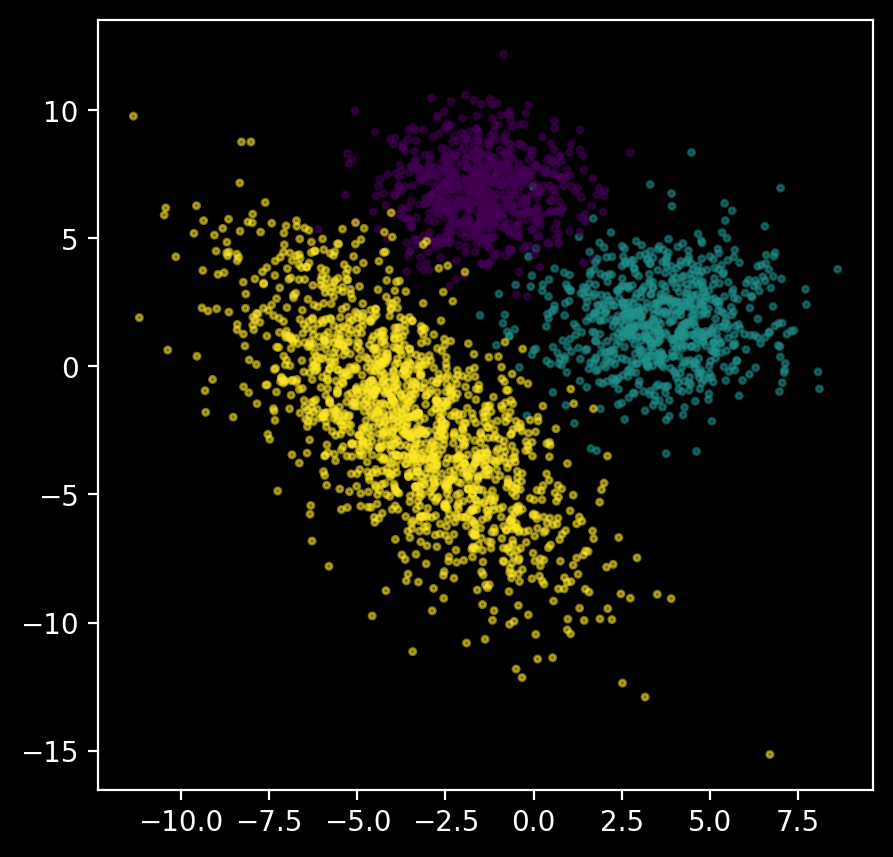

{0: 750, 1: 750, 2: 1500}

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5,s=5)
plt.show()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

In [21]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan.fit(X)
dbscan.labels_

array([0, 0, 1, ..., 1, 1, 1])

In [22]:
# Задание 4.8.1 
# Какой параметр DBSCAN устанавливает число объектов в окрестности, которое определяет, является ли объект основным или нет?

# min_samples

In [23]:
# Задание 4.8.2
# Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета. Выведите число получившихся кластеров.

# Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

# Задание 4.8.3
# Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

# 368

dbscan = DBSCAN(eps=0.9,min_samples=35)
dbscan.fit(X)
nclusters = np.unique(dbscan.labels_,return_counts=True )
nclusters

(array([-1,  0,  1,  2]), array([ 368,  656,  721, 1255]))

In [24]:
# Задание 4.8.4
# Проверьте, как настройка параметров влияет на результат работы DBSCAN. Обучите модель DBSCAN с параметрами eps=0.8 и min_samples=35 на признаках объектов исходного датасета.

# 583

dbscan = DBSCAN(eps=0.8,min_samples=35)
dbscan.fit(X)
nclusters = np.unique(dbscan.labels_,return_counts=True )
nclusters

(array([-1,  0,  1,  2]), array([ 583,  603,  681, 1133]))

# <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden;background-image: url(https://i.imgur.com/ohv2A06.png)"><b><span style='color:#F1A424'>4.11 |</span></b> Коэффициент силуэта Практика</div>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131660482634046

В качестве параметров в функции silhouette_score используются:
   
- `X` — массив признаков объектов выборки или массив попарных расстояний между объектами;
- `Y` — массив предсказанных кластеров для объектов выборки;

metric — метрика, используемая для вычисления расстояния между объектами, мы будем использовать euclidean (Евклидово расстояние)

In [27]:
# Задание 4.11.1
# Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. 
# Посчитайте коэффициент силуэта для получившейся кластеризации.

from sklearn.mixture import GaussianMixture

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
silhouette_score(X=X, labels=y_pred, metric='euclidean')

0.3988405457243407

In [28]:
# Задание 4.11.2
# Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:
# K-means — n_clusters=3, random_state=42
# EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
# Агломеративная кластеризация – n_clusters=3
# DBSCAN – eps=0.9, min_samples=35

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('kmeans',sil)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('gm',sil)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('agglomerative',sil)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
print('dbscan',sil)

kmeans 0.5131660482634046
gm 0.3988405457243407
agglomerative 0.4811992210663849
dbscan 0.4454335539277996


In [29]:
# Задание 4.11.3
# Подберите оптимальное количество кластеров с помощью коэффициента силуэта.
# Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

# В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.
# Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.
# Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

lst_clusters = [i for i in range(2,11)]

max_sil = [-777,-777,-777]
opt_cluster = [-777,-777,-777]
for n_cluster in lst_clusters:

    # K-Means
    kmeans = KMeans(n_clusters=n_cluster,
                    random_state=42)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[0]):
        print('kmeans',n_cluster, sil)
        max_sil[0] = sil
        opt_cluster[0] = n_cluster

    # Gaussian Mixture
    em_gm = GaussianMixture(n_components=n_cluster, 
                            random_state=42)
    em_gm.fit(X)       
    y_pred = em_gm.predict(X)
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[1]):
        print('gm',n_cluster, sil)
        max_sil[1] = sil
        opt_cluster[1] = n_cluster

    # Agglomerative Cluster
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    sil = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if(sil > max_sil[2]):
        print('agglomerative',n_cluster, sil)
        max_sil[2] = sil
        opt_cluster[2] = n_cluster

print(opt_cluster)

kmeans 2 0.45525850917271177
gm 2 0.45506572865005773
agglomerative 2 0.40560374862968174
kmeans 3 0.5131660482634046
agglomerative 3 0.4811992210663849
gm 4 0.510655066343949
agglomerative 4 0.48470679039805054
[3, 4, 4]


### 4.12. Однородность Практика



In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_ 
# теперь посчитаем однородность
homosc = homogeneity_score(labels_true=y, labels_pred=kmeans_pred)
homosc

0.804474693112785

In [31]:
# Задание 4.12.1
# Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering
# и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

# k-means — n_clusters=3, random_state=42
# GaussianMixture — n_components=3, random_state=42
# AgglomerativeClustering — n_clusters=3
# DBSCAN — eps=0.9, min_samples=35

# В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей
# При решении задания модуля стандартизация должна быть включена.

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import homogeneity_score

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('kmeans',homosc)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('gmm',homosc)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('agglomerative',homosc)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
homosc = homogeneity_score(labels_true=y, labels_pred=y_pred)
print('dbscan',homosc)

kmeans 0.804474693112785
gmm 0.9339791347507893
agglomerative 0.9099781767383747
dbscan 0.00044465831964150197


# <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden;background-image: url(https://i.imgur.com/ohv2A06.png)"><b><span style='color:#F1A424'>4.13 |</span></b> Полнота Практика</div>

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем однородность
completeness_score(labels_true=y,
                   labels_pred=kmeans_pred)

0.7828224102025245

In [33]:
# Задание 4.13.1
# Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации.

from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

model = StandardScaler()
X = model.fit_transform(X)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
completeness_score(labels_true=y,
                   labels_pred=y_pred)

0.9325740421656737

In [34]:
# Сравните результаты кластеризации алгоритмов K-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:

# K-means – n_clusters=3, random_state=42
# GaussianMixture – n_components=3, random_state=42
# AgglomerativeClustering – n_clusters=3
# DBSCAN – eps=0.9, min_samples=35

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

model = StandardScaler()
X = model.fit_transform(X)

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
completeness = completeness_score(labels_true=y,
                                  labels_pred=y_pred)
print('kmeans',completeness)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
completeness = completeness_score(labels_true=y,
                                  labels_pred=y_pred)
print('gmm',completeness)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
completeness = completeness_score(labels_true=y,
                                  labels_pred=y_pred)
print('agglomerative',completeness)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
completeness = completeness_score(labels_true=y,
                                  labels_pred=y_pred)
print('dbscan',completeness)

kmeans 0.7828224102025245
gmm 0.9325740421656737
agglomerative 0.9058386997451113
dbscan 0.08342237034907717


# <div style="padding: 50px;color:white;margin:10;font-size:80%;text-align:left;display:fill;border-radius:10px;background-color:#323232;overflow:hidden;background-image: url(https://i.imgur.com/ohv2A06.png)"><b><span style='color:#F1A424'>4.14 |</span></b> V-Мера Практика</div>

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.core.multiarray import rad2deg
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, 
                              centers=2, 
                              center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)

X_2, _ = datasets.make_blobs(n_samples=n_samples,
                             random_state=170,
                             centers=[[-4, -3]],
                             cluster_std=[1.9])

transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)),np.concatenate((dataset[1], np.array([2] * len(X_2))))

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score           

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем однородность
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.7972774344500205

In [36]:
# Задание 4.14.1
# Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. 

from sklearn.mixture import GaussianMixture

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)  
print('gmm',v_measure)


gmm 0.619672859003694


In [37]:
# Задание 4.14.2
# Сравните результаты кластеризации алгоритмов K-means, GaussianMixture, 
# AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# K-Means
kmeans = KMeans(n_clusters=3,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans',v_measure)

# Gaussian Mixture
em_gm = GaussianMixture(n_components=3, 
                        random_state=42)
em_gm.fit(X)       
y_pred = em_gm.predict(X)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)  
print('gmm',v_measure)

# Agglomerative Cluster
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)  
print('agglomerative',v_measure)

# DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',v_measure)

kmeans 0.7972774344500205
gmm 0.619672859003694
agglomerative 0.703747024360433
dbscan 0.7732549110297919


In [38]:
# Задание 4.14.3
# Сравним модификации K-means с использованием случайной инициализации центроид
# и с использованием алгоритма K-means++ для инициализации центроид.

# Для этого обучим на исходном датасете 2 модели K-means со следующими параметрами:
# n_clusters=3, init='k-means++', n_init=1, random_state=42
# n_clusters=3, init='random', n_init=1, random_state=42

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

# K-Means hyperparameters #1
kmeans = KMeans(n_clusters=3,
                n_init=1,
                init='k-means++',
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans',v_measure)

# K-Means hyperparameters #1
kmeans = KMeans(n_clusters=3,
                n_init=1,
                init='random',
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans',v_measure)

kmeans 0.5990620007488798
kmeans 0.7881303880112289


In [39]:
# 4.14.4
# Теперь сравним K-means с ещё одной модификацией – K-means mini batch. 
# Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом:

from sklearn.cluster import MiniBatchKMeans

# K-Means hyperparameters #1
kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred)
print('kmeans',v_measure)

# K-Means hyperparameters #2
kmeans = KMeans(n_clusters=3,
                n_init=1,
                random_state=42)
kmeans.fit(X)
y_pred = kmeans.labels_
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('kmeans',v_measure)

kmeans 0.7810452632465894
kmeans 0.5990620007488798


In [40]:
# 4.14.5
# Рассмотрим агломеративную кластеризацию. 
# Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.
# Обучите на исходном датасете четыре модели AgglomerativeClustering (n_clusters=3, меняя параметр linkage)

linkage_id = ['ward','complete','average','single']

for linkage in linkage_id:
    ac = AgglomerativeClustering(n_clusters=3,
                                 linkage=linkage)
    ac.fit(X)
    y_pred = ac.labels_.astype(np.int)
    v_measure = v_measure_score(labels_true=y,
                                labels_pred=y_pred)
    print('agglo',linkage,v_measure)

agglo ward 0.703747024360433
agglo complete 0.4105143541946565
agglo average 0.5391616325942709
agglo single 0.0008842106330108959


In [41]:
# Задание 4.14.6
# Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.
# Обучите на исходном датасете две модели AgglomerativeClustering:
# [1] с параметром n_clusters=3
# [2] с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета

from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, 
                                include_self= False)
connectivity = 0.5 * (connectivity + connectivity.T)

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure) 

# with connectivity
ac = AgglomerativeClustering(n_clusters=3,
                             connectivity=connectivity)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure)


0.703747024360433
0.902634398342219


In [42]:
# Задание 4.14.7
# Алгоритм DBSCAN очень требователен к параметрам: 
# небольшое изменение в параметре eps или max_samples может изменить результат и качество кластеризации.

# Обучите на исходном датасете две модели DBSCAN:
# с параметрами eps=0.9, min_samples=35
# с параметрами eps=0.8, min_samples=35

from sklearn.cluster import DBSCAN

# DBSCAN (eps=0.9)
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',v_measure)

# DBSCAN (esp=0.8)
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',v_measure)

dbscan 0.7732549110297919
dbscan 0.7063100442576922


In [43]:
# *Задание 4.14.8
# Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. 
# Посмотрим на качество кластеризации без учёта таких объектов

# Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35.
# Посчитайте значение v-меры только для основных и граничных объектов выборки, 
# то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

from numpy.random import random_sample

dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y, labels_pred=y_pred)
print('dbscan',v_measure)

base = y_pred[dbscan.core_sample_indices_]
base_y = y[dbscan.core_sample_indices_]

v_measure = v_measure_score(labels_true=base_y, labels_pred=base)
print('dbscan-core',v_measure)

dbscan 0.7063100442576922
dbscan-core 0.9963438707641181


In [44]:
# Задание 4.14.9
# В курсе мы рассмотрели две метода нормализации данных:
# MinMax нормализация — приведение данных к масштабу между 0 и 1.
# Стандартная нормализация — данные имеют среднее 0 и стандартное отклонение 1.

# Проверим, влияет ли предобработка данных на результат кластеризации. Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:
# на признаках исходного датасета,
# предварительно трансформируйте признаки при помощи стандартной нормализации.

from sklearn.preprocessing import StandardScaler

model = StandardScaler()
X_sca = model.fit_transform(X)

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure) 

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_sca)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure) 


0.703747024360433
0.9079037199053294


In [45]:
# Задание 4.14.10
# Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

# на признаках исходного датасета,
# предварительно трансформируйте признаки при помощи MinMax нормализации.

from sklearn.preprocessing import MinMaxScaler

model = MinMaxScaler()
X_sca = model.fit_transform(X)

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure) 

# Standard
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X_sca)
y_pred = ac.labels_.astype(np.int)
v_measure = v_measure_score(labels_true=y,
                            labels_pred=y_pred)
print(v_measure) 

0.703747024360433
0.8929241488344335
